In [66]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [67]:

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [68]:
path = untar_data(URLs.MNIST_SAMPLE)

In [69]:
#hide
Path.BASE_PATH = path

In [70]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [71]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [72]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

In [73]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [74]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [75]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [76]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [77]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

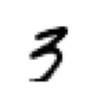

In [78]:
show_image(three_tensors[7]); 

In [79]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [80]:
len(stacked_threes.shape)

3

In [81]:
stacked_threes.ndim

3

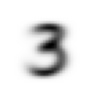

In [82]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

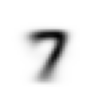

In [83]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

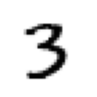

In [84]:
a_3 = stacked_threes[1]
show_image(a_3);

In [85]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [86]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [87]:
valid_3_tens = torch.stack([tensor(Image.open(o))
for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [88]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [89]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1470, 0.1633, 0.1359,  ..., 0.1413, 0.1367, 0.1175]),
 torch.Size([1010]))

In [90]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [91]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [92]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [93]:
accuracy_3s = is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

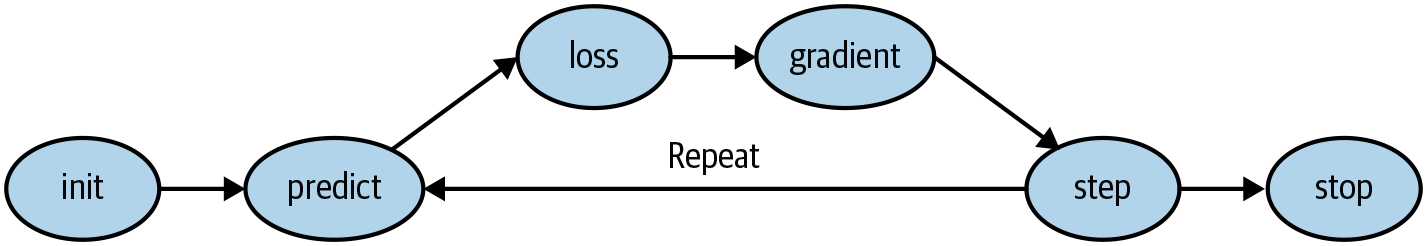

In [94]:
def f(x): return x**2

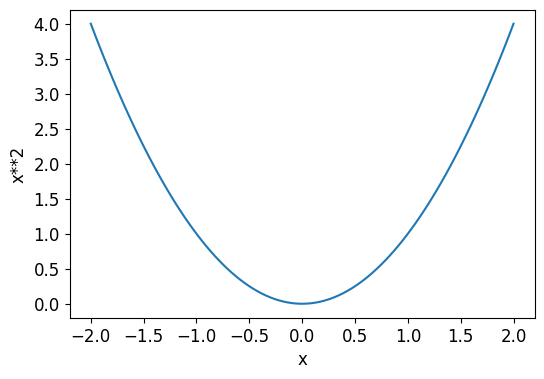

In [95]:
plot_function(f, 'x', 'x**2')

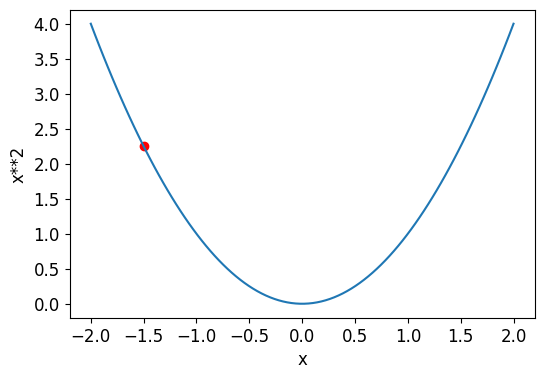

In [96]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [97]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt.backward()
xt.grad
tensor(6.)

tensor(6.)

In [98]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [99]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [100]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [101]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [102]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
speed

tensor([68.7201, 54.1713, 39.1655, 30.9314, 25.6098, 17.9372, 13.3883,  4.3370,  0.6512,  2.9104,  1.7507,  1.6146,  6.4822, 14.0070, 16.1836, 22.7767, 29.7282, 43.5574, 56.2371, 70.5393])

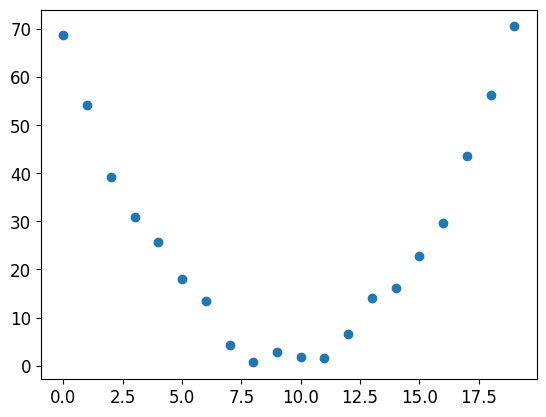

In [103]:
plt.scatter(time,speed);

In [104]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [105]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [106]:
params = torch.randn(3).requires_grad_()

In [107]:
preds = f(time, params)

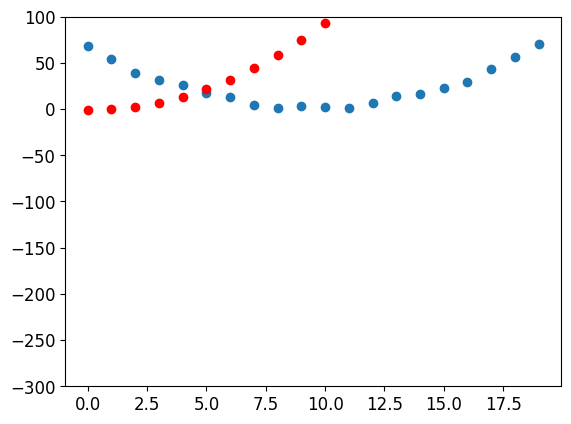

In [108]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, preds.detach().numpy(), color='red')
    ax.set_ylim(-300,100)
show_preds(preds)

In [109]:
loss = mse(preds, speed)
loss

tensor(19247.3613, grad_fn=<MeanBackward0>)

In [110]:
loss.backward()
params.grad

tensor([45767.9922,  2928.2803,   180.8481])

In [111]:
params.grad * 1e-5

tensor([0.4577, 0.0293, 0.0018])

In [112]:
params

tensor([ 0.9912, -0.5672, -0.5706], requires_grad=True)

In [113]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [114]:
preds = f(time,params)
mse(preds, speed)

tensor(4155.9971, grad_fn=<MeanBackward0>)

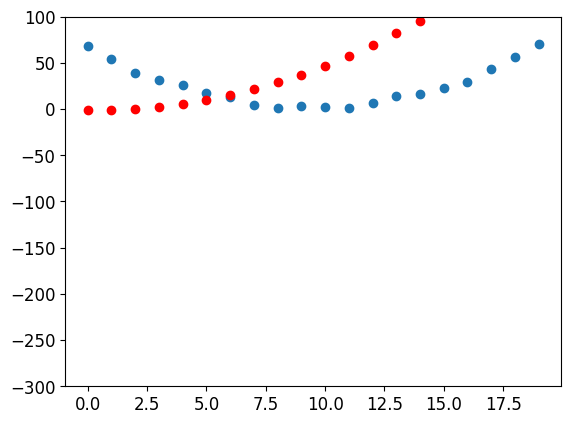

In [115]:
show_preds(preds)

In [116]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [120]:
for i in range(20): apply_step(params)

633.1754150390625
633.1707153320312
633.165771484375
633.1610107421875
633.1561889648438
633.1513061523438
633.146484375
633.1417236328125
633.1368408203125
633.1319580078125
633.127197265625
633.1224365234375
633.1175537109375
633.1126708984375
633.10791015625
633.1031494140625
633.0983276367188
633.093505859375
633.0886840820312
633.0838623046875


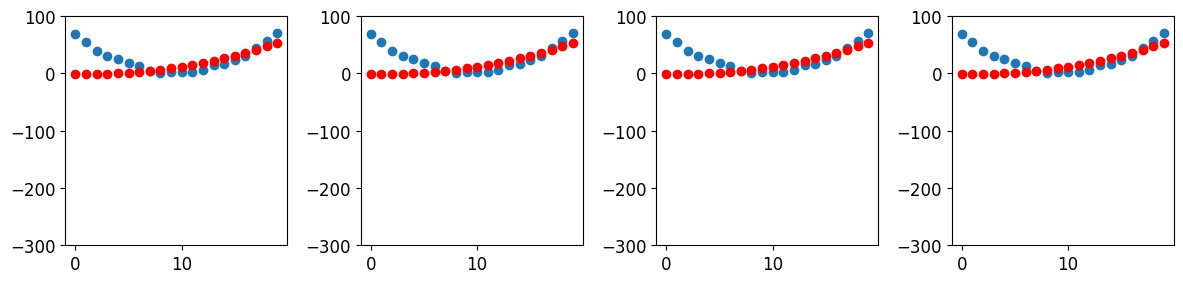

In [121]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()